In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_auto = pd.read_csv("Auto.csv")
df_auto["horsepower"] = pd.to_numeric(df_auto["horsepower"], errors="coerce")
df_auto = df_auto.dropna(subset=["horsepower", "mpg"])
X = df_auto["horsepower"]
y = df_auto['mpg']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        14:22:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

1.Is there a relationship between the predictor and the response?
Definitely,yes.Because,as horsepower increases,mpg decreases.

2.How strong is the relationship between the predictor and the response?
Very strong,because responce directly depends from predictor AND ONLY FROM PREDICTOR

3.Is the relationship between the predictor and the response positive
or negative?
Negative,because as predictor increases,responce decreases.

4.What is the predicted mpg associated with a horsepower of 98?
39.935-0.157845*98 = 24.47

5.What is the value of the coefficient of determination (R2)? Interpret
its meaning in this context
In this context R2 or coefficient of determination evaluates for how much percentage responce depends only
on predictor.So it means that 60% of mpg can be described only by horsepower.While other 40% depends on other predictors.

In [24]:
results.rsquared

np.float64(0.6059482578894348)

6.According to the p-value of the predictor, is the horsepower statistically significant at the 5% level?
Since p-value is less than 5%,we reject the null hypothesis and conclude that horsepower is statistically significant.


7.Compare the standard error of the estimate to the mean of mpg.
What does this tell you about the model’s accuracy?

In [26]:

se_model = np.sqrt(results.mse_resid)

mean_mpg = np.mean(y)

print("Standard error of the estimate:", se_model)
print("Mean of mpg:", mean_mpg)
print("Relative error:", se_model / mean_mpg)


Standard error of the estimate: 4.90575691954594
Mean of mpg: 23.445918367346938
Relative error: 0.20923714066914834


2.Plot the response and the predictor in a new set of axes ax. Use the
ax.axline() method or the abline() function to display the least squares
regression line.

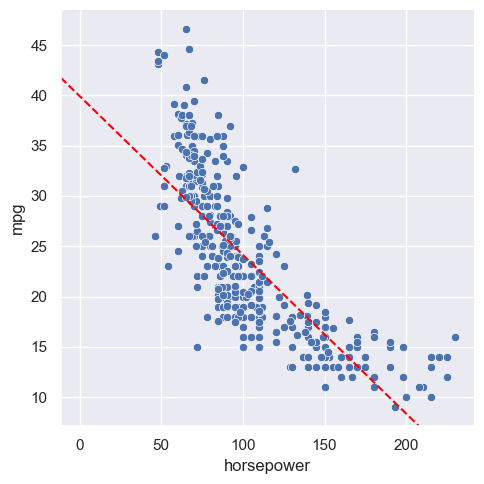

In [47]:
import seaborn as sns
g = sns.relplot(data=df_auto, x="horsepower", y="mpg")
ax = g.ax
ax.axline((0, 39.935861), slope=-0.157845, color="red", linestyle="--")

3.Compare the residuals Vs. Fitted values with a scatter plot. Use this
plot to checks for linearity and homoscedasticity (constant variance of
residuals). Interpretation: Residuals should be scattered randomly around
zero. What does a curved pattern suggest?

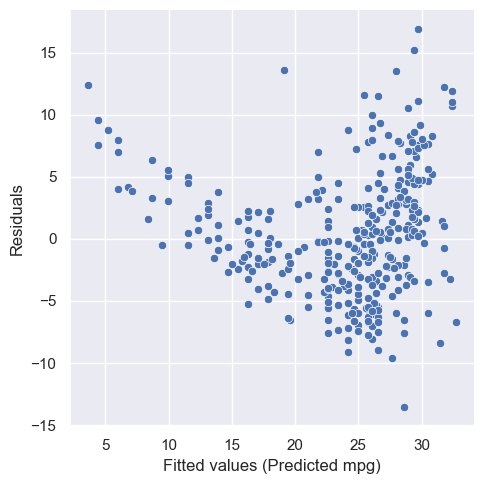

In [70]:
x_values = results.fittedvalues      
y_values = results.resid             
sns.set_theme()
g = sns.relplot(x=x_values, y=y_values, kind="scatter")
g.set_axis_labels("Fitted values (Predicted mpg)", "Residuals")

From the graph, we can see that the residuals are not randomly scattered around the zero line.Instead, they show noticeable variance and a possible curved pattern.
This suggests that the relationship between horsepower and mpg may not be perfectly linear, and the model might suffer from heteroscedasticity.

4.Produce a scatterplot matrix which includes all of the variables in the data
set. You can use ‘PairGrid‘ for it: PairGrid


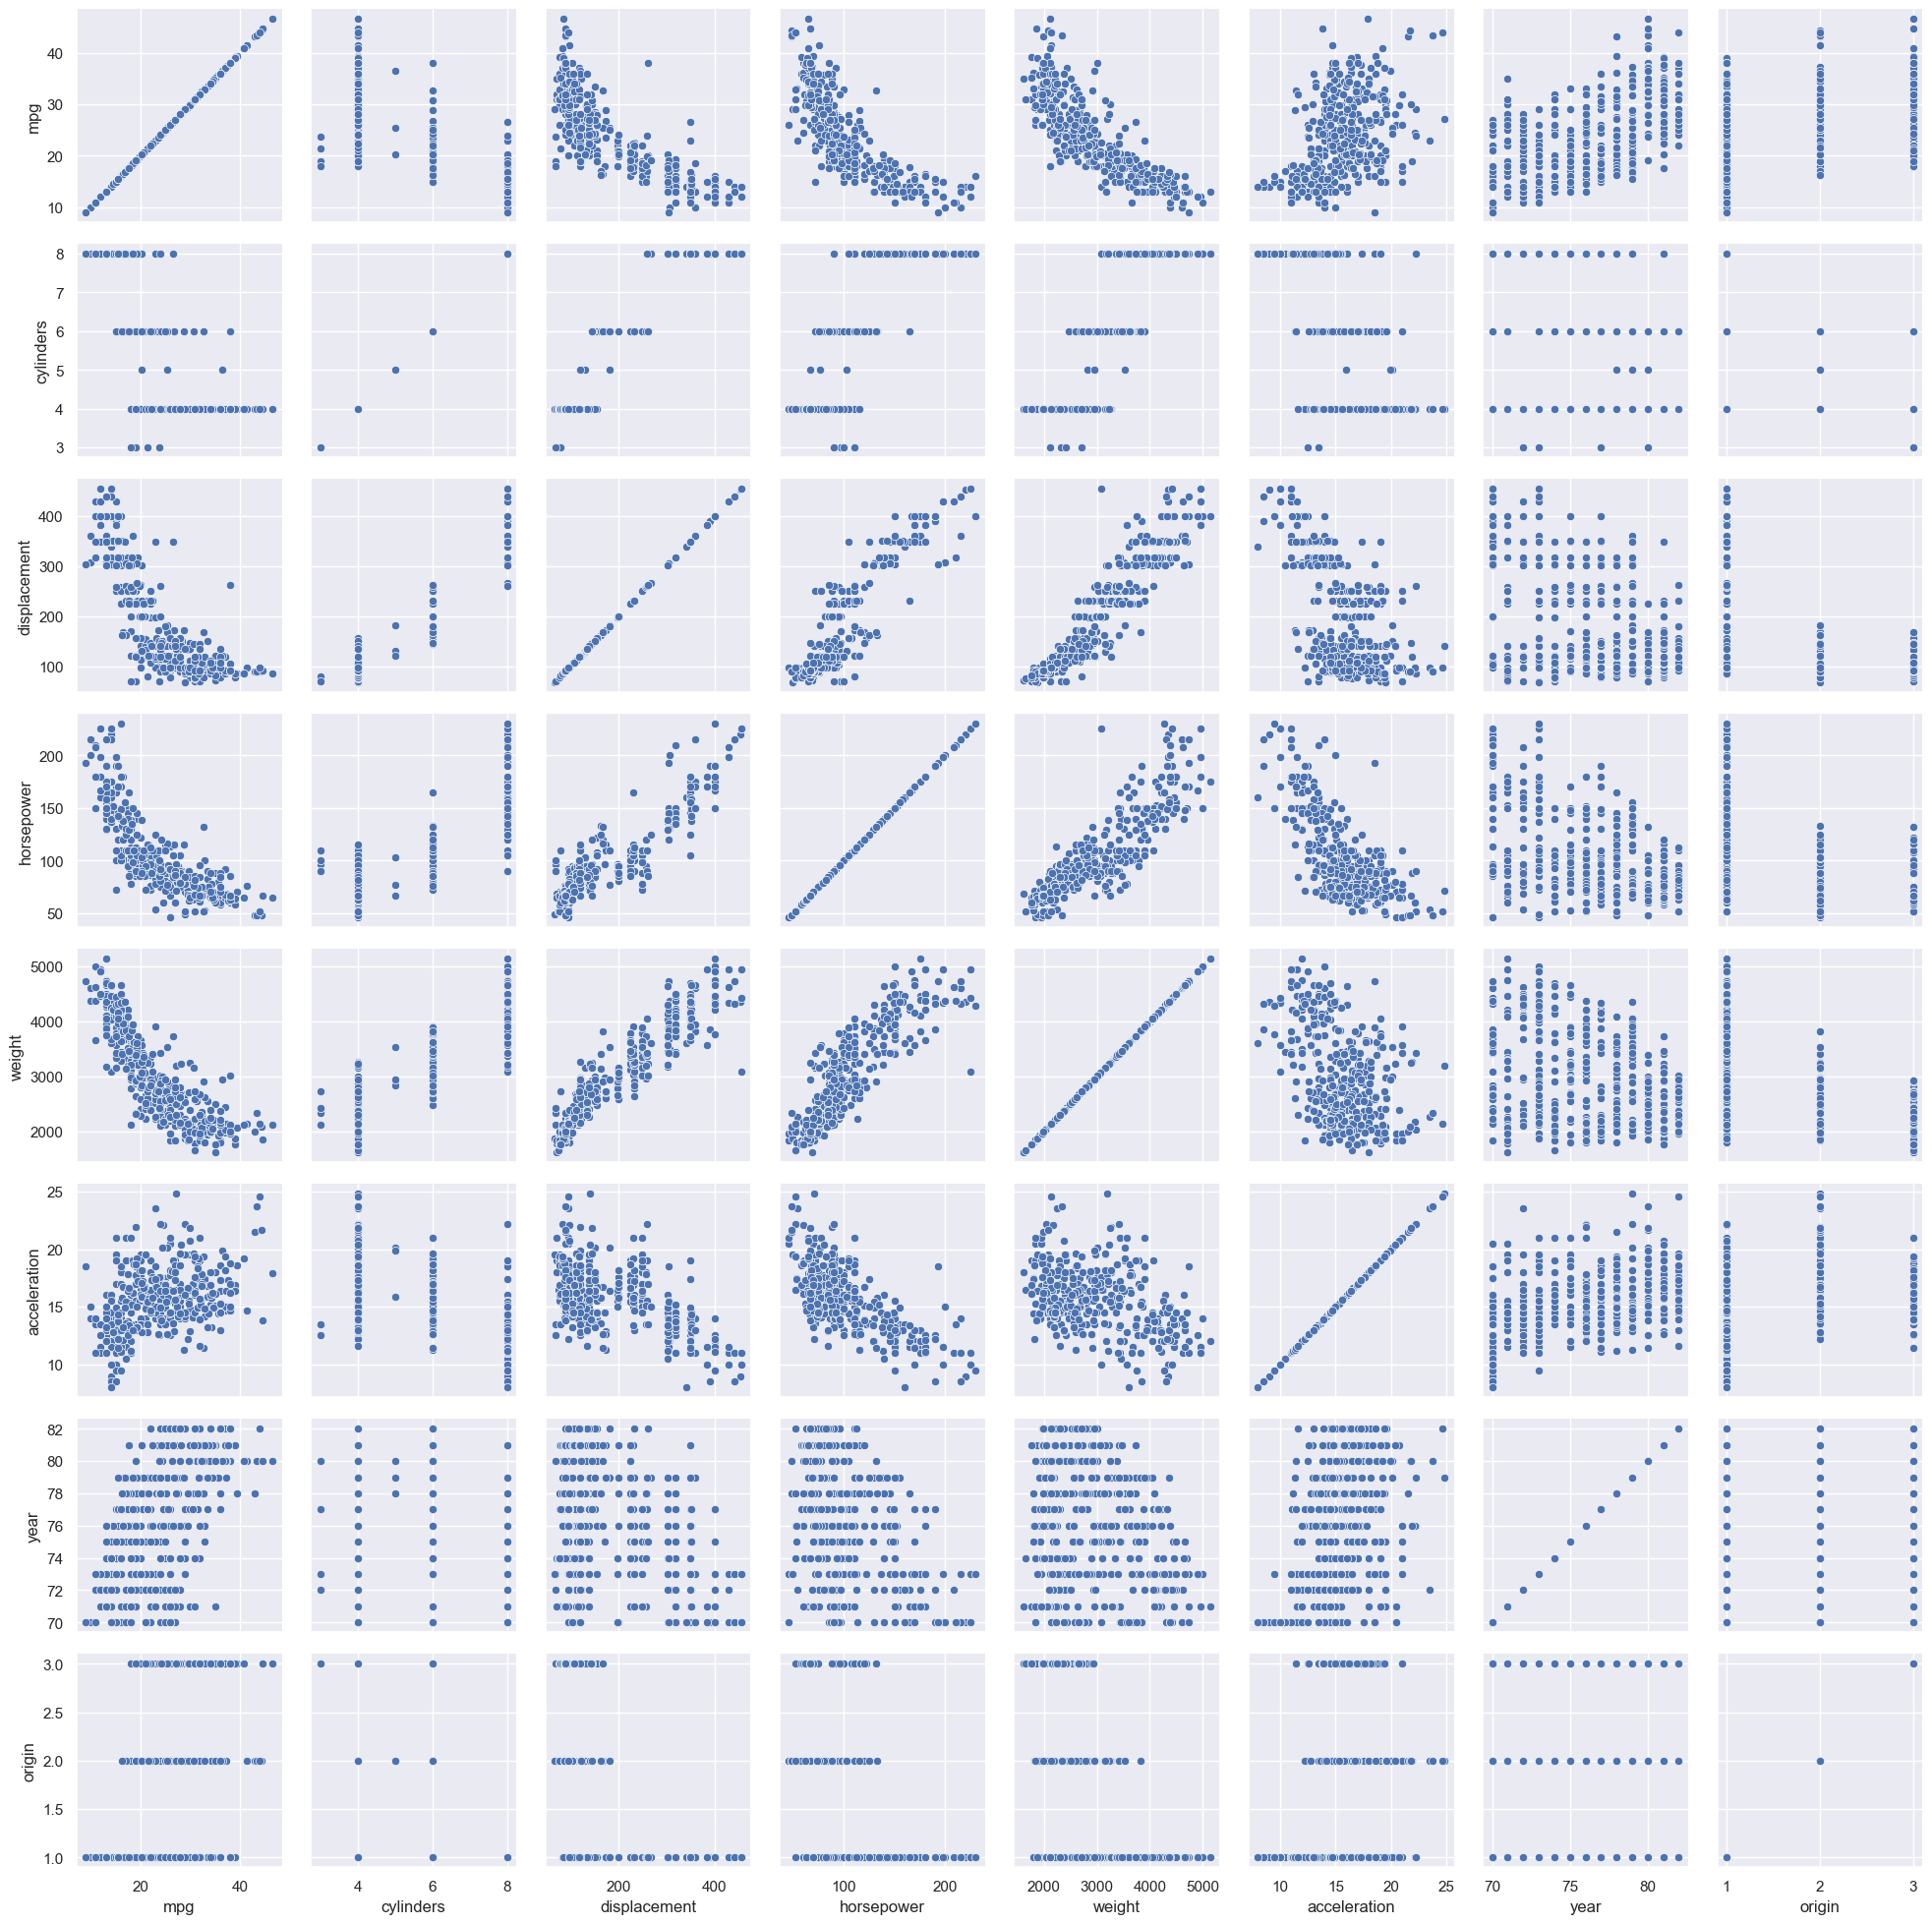

In [74]:
g = sns.PairGrid(df_auto)
g.map(sns.scatterplot)


5.Compute the matrix of correlations between the variables using the DataFrame.corr()
method. Find a fancy way to display this matrix.

<Axes: >

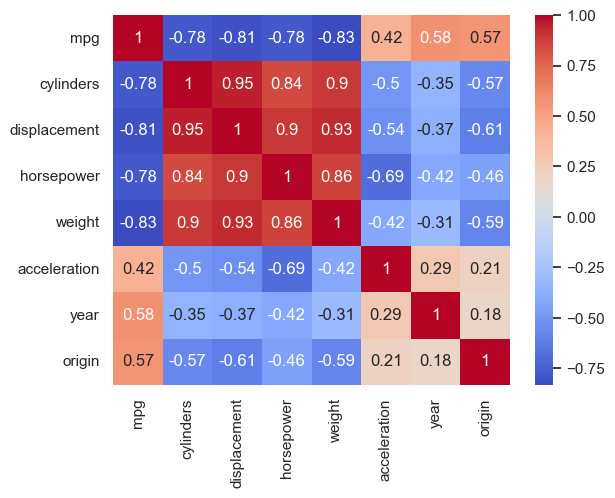

In [85]:
sns.heatmap(df_auto.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")

6.Perform a multiple linear regression with mpg as the response and all other
variables except name as the predictors. Use the summarize() function to
print the results.

In [90]:
X1 = df_auto[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
y = df_auto["mpg"]

X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1)
results1 = model1.fit()

In [91]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        17:01:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

6.1
Is there a relationship between the predictors and the response? Look
at the R2 value and the p-values of the coefficients to answer this
question.

First, we can look at the p-values of each predictor.Most of them are below the 5% significance level,which means that these variables are statistically significant predictors of mpg.However,cylinders,horsepower and acceleration have p-values greater than 0.05, meaning that we do not have enough evidence to conclude that they have a statistically significant effect on mpg.
Also overall R2 or coefficient of determination is 0.82 which means that our responce variable has a strong relationship with predictors.

6.2
Which predictors appear to have a statistically significant relationship to the response? Focus on the p-values associated with each
predictor

displacement,weight,year,origin because they have p-value less than 5% significance level.

6.3
What does the coefficient for the year variable suggest? Interpret its
sign and magnitude.

It's sign is plus and magnitude is 0.7508,it means that it has positive impact on responce and by increasing year by one,we increase overall mpg by 0.7508

7
Produce a residual plot of the linear regression fit. Comment on any
problems you see with the fit. Do your plot suggest any unusually large
outliers? In your opinion, which of the MSE, RMSE and MAE would be
more convenient to use?

I think due to outliers the most appropriate method to use will be MAE.Because it's stable to outliers.

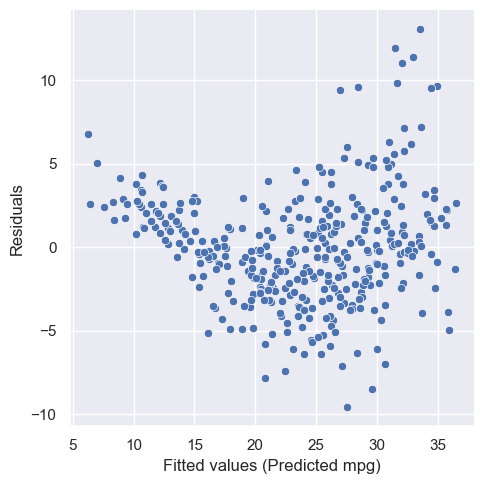

In [93]:
g = sns.relplot(
    x = results1.fittedvalues,
    y = results1.resid,
    kind = "scatter"
)
g.set_axis_labels("Fitted values (Predicted mpg)", "Residuals")


8
Fit some models with interactions. Do any interactions appear to be
statistically significant?

i did interaction with horsepower and weight,and this interaction is statistically significant as we can see from it's p-value


In [94]:
import statsmodels.formula.api as smf

model_int = smf.ols("mpg ~ horsepower * weight + year", data=df_auto).fit()
print(model_int.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     581.5
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          3.74e-162
Time:                        17:49:53   Log-Likelihood:                -979.51
No. Observations:                 392   AIC:                             1969.
Df Residuals:                     387   BIC:                             1989.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.5769      3.91

9
Try a few different transformations of the variables, such as log(X),sqrt(X),X^2. 
Comment on your findings
I can compare R2 
for regular model is 0.606
for model with logarithm 0.668
for model with square 0.507
for model with squareroot 0.644
This shows that mathematical transformations of predictors can significantly affect the model’s fit and explanatory power.
In particular, the logarithmic transformation gave the highest R2, suggesting a better fit.
P-values and coefficients may also change, since transformations modify the scale and shape of relationships between variables.

In [95]:
model = smf.ols("mpg ~ horsepower", data=df_auto).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        17:57:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [97]:
model_log = smf.ols("mpg ~ np.log(horsepower)", data=df_auto).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           1.70e-95
Time:                        17:58:22   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3

In [101]:
model_sq = smf.ols("mpg ~ I(horsepower**2)", data=df_auto).fit()
print(model_sq.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           6.23e-62
Time:                        18:02:23   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.4658      0

In [99]:
model_sqrt = smf.ols("mpg ~ np.sqrt(horsepower)", data=df_auto).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           2.02e-89
Time:                        17:58:31   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052    

Linear regression assumptions

a)What is the bias of an estimator ? Max two sentences.

Bias of an estimator is the value that shows how far on average our estimator is from the true parameter value.

b)Show that the OLS estimator is unbiased.

b_hat = (X'X)-1 X' y = (X'X)-1 X' (Xb+e) = (X'X)-1 X'Xb + (X'X)-1 X'e = b + (X'X)-1 X'e


E[b + (X'X)-1 X'e] = b + (X'X)-1 X'E[e] (since E[e]= 0)
->E[b_hat] = b + 0 = 0
E[b_hat] = b 
it means b_hat is unbiassed

c)What is the homoskedasticity assumption ? Give the maths and intuition
Homoskedasticity means equal variance for the residuals,while heteroscedasticity means change of variance if predictor changes.

d)Derive the variance of βˆ under homoskedasticity assumption
b_hat = (X'X)-1 X' y = (X'X)-1 X' (Xb+e) = (X'X)-1 X'Xb + (X'X)-1 X'e = b + (X'X)-1 X'e
by homoskedasticity Var(e) = sigma_square
Var[b_hat] = Var[(X'X)-1 X'e] = (X'X)-1 X' Var(e) X (X'X)-1 = Var(e) (X'X)-1 X'X (X'X)-1 = Var(e) (X'X)-1 = sigma_square (X'X)-1


e)If the zero conditional mean and homoskedasticity hold, how are the
residuals distributed ?
On average residuals are equal to 0 and they have same variance it means that they are indepedently and idetically distributed

1.Which metric uses squared errors to more heavily penalize large deviations?
D)Mean squared error

2.In a residual plot, a systematic increasing or decreasing trend typically
indicates:
A)Heteroscedasticity

3.What does MAE measure?
B) The average of absolute errors

4.What is the advantage of using RMSE over MSE?
D)it is in the same units as the target variable calculation

5.A feature interaction means that:
D)The relationship between one feature and the target variable changes
across different levels of another feature

6.If the residuals of a model are normally distributed around zero with no
apparent pattern, this suggests:
C)The model assumptions are generally satisfied

7.Which of the following metrics is the most robust to outliers?
D)MAE

8.A residual is defined as:
A)The difference between the predicted and actual value

9.Which metric is expressed in the same units as the target variable?
B)RMSE

10.You evaluate a regression model to predict a price in euro and obtain and
obtain: MAE = 3.0. Which interpretation is correct?
A)On average, the model’s predictions deviate by 3 euros (in absolute
value) from the actual values.

11.You evaluate a regression model to predict a price in euro and obtain:
MSE = 25.0 Which interpretation is correct?
D)The mean of the squared errors of the model is 25 square euros,
indicating sensitivity to large errors

12.You evaluate a regression model to predict a price in euro and obtain and
obtain: RMSE = 4.0. Which interpretation is correct?
C)The square root of the mean of the squared errors is 4 euros, giving
more weight to large errors than MAE

13.Which plot is most suitable for visualizing the distribution of residuals?
D)Residuals vs. fitted values plot


14.What does a U-shaped pattern in a residual plot typically indicate?
B)There is a non-linear relationship not captured by the model

15.What is the bias of an estimator?
A)The difference between the estimator’s expected value and the true
parameter value

16.Under which condition is the Ordinary Least Squares (OLS) estimator
unbiased?
D)If the conditional expectation of errors E[ϵ|X] = 0

17.Which assumption is violated if the variance of the residuals is not constant?
B)Homoskedasticity

18.What does the acronym BLUE stand for in the context of the OLS estimator?
C) Best Linear Unbiased Estimator

19.What is the effect of heteroskedasticity on the OLS estimator?
B)It remains unbiased but loses its efficiency (no longer has minimum
variance)